# AUTONORMALIZE DEMO 
Using Autonormalize to normalize a kaggle dataset about liquor purchasing orders.

This dataset can be found on kaggle at https://www.kaggle.com/residentmario/iowa-liquor-sales. 

In [3]:
import os
import time

import pandas as pd
from demo.liquor import load_sample
from featuretools.autonormalize import autonormalize as an

In [2]:
df = load_sample()
print("Rows: "+ str(df.shape[0]))
print("Columns: " + str(df.shape[1]))
df.head(3)

Rows: 1497599
Columns: 13


,Unnamed: 0,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,Category,Category Name
0,6,S28865700001,11/09/2015,2538,Hy-Vee Food Store #3 / Waterloo,1422 FLAMMANG DR,WATERLOO,50702,"1422 FLAMMANG DR\nWATERLOO 50702\n(42.459938, ...",7.0,Black Hawk,1701100.0,DECANTERS & SPECIALTY PACKAGES
1,8,S29339300091,11/30/2015,2662,Hy-Vee Wine & Spirits / Muscatine,"522 MULBERRY, SUITE A",MUSCATINE,52761,"522 MULBERRY, SUITE A\nMUSCATINE 52761\n",70.0,Muscatine,1701100.0,DECANTERS & SPECIALTY PACKAGES
2,13,S28866900001,11/11/2015,3650,"Spirits, Stogies and Stuff",118 South Main St.,HOLSTEIN,51025,118 South Main St.\nHOLSTEIN 51025\n(42.490073...,47.0,Ida,1701100.0,DECANTERS & SPECIALTY PACKAGES


In [6]:
df.drop(columns='Unnamed: 0').to_csv('test.csv', index=False)

,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,Category,Category Name
0,S28865700001,11/09/2015,2538,Hy-Vee Food Store #3 / Waterloo,1422 FLAMMANG DR,WATERLOO,50702,"1422 FLAMMANG DR\nWATERLOO 50702\n(42.459938, ...",7.0,Black Hawk,1701100.0,DECANTERS & SPECIALTY PACKAGES
1,S29339300091,11/30/2015,2662,Hy-Vee Wine & Spirits / Muscatine,"522 MULBERRY, SUITE A",MUSCATINE,52761,"522 MULBERRY, SUITE A\nMUSCATINE 52761\n",70.0,Muscatine,1701100.0,DECANTERS & SPECIALTY PACKAGES
2,S28866900001,11/11/2015,3650,"Spirits, Stogies and Stuff",118 South Main St.,HOLSTEIN,51025,118 South Main St.\nHOLSTEIN 51025\n(42.490073...,47.0,Ida,1701100.0,DECANTERS & SPECIALTY PACKAGES
3,S29134300126,11/18/2015,3723,J D Spirits Liquor,1023 9TH ST,ONAWA,51040,"1023 9TH ST\nONAWA 51040\n(42.025841, -96.095845)",67.0,Monona,1081200.0,CREAM LIQUEURS
4,S29282800048,11/23/2015,2642,Hy-Vee Wine and Spirits / Pella,512 E OSKALOOSA,PELLA,50219,"512 E OSKALOOSA\nPELLA 50219\n(41.397023, -92....",63.0,Marion,1701100.0,DECANTERS & SPECIALTY PACKAGES
...,...,...,...,...,...,...,...,...,...,...,...,...
1497594,S11434200003,04/03/2013,3065,Montezuma Super Valu,201 S FRONT ST,MONTEZUMA,50171,"201 S FRONT ST\nMONTEZUMA 50171\n(41.584179, -...",79.0,Poweshiek,1031080.0,VODKA 80 PROOF
1497595,S21338800011,09/22/2014,4154,Fareway Stores #055 / Hiawatha,885 MILLER RD,HIAWATHA,52233,"885 MILLER RD\nHIAWATHA 52233\n(42.046291, -91...",57.0,Linn,1051010.0,AMERICAN GRAPE BRANDIES
1497596,S15171100028,10/16/2013,4879,Sam's Mini Mart / Morningside Ave Si,4218 MORNINGSIDE AVE,SIOUX CITY,51106,4218 MORNINGSIDE AVE\nSIOUX CITY 51106\n(42.47...,97.0,Woodbury,1032200.0,IMPORTED VODKA - MISC
1497597,S09577300021,12/19/2012,4332,Fast Mart / University Ave,1621 UNIVERSITY AVE,DES MOINES,50314,1621 UNIVERSITY AVE\nDES MOINES 50314\n(41.600...,77.0,Polk,1052010.0,IMPORTED GRAPE BRANDIES


In [15]:
df.dtypes


Invoice/Item Number     object
Date                    object
Store Number             int64
Store Name              object
Address                 object
City                    object
Zip Code                object
Store Location          object
County Number          float64
County                  object
Category               float64
Category Name           object
dtype: object

In [17]:
df = df.astype({"County Number": 'int64', "Category": 'int64'})

We load our data into a pandas dataframe. For the purpose of manageability we drop columns columns 13-32 and rows 1,500,000+. After dropping duplicates and rows with empty entries, we are left with a 12 x 1,497,599 dataframe, with the columns as shown above. Just based off of the names of the columns we can see there are definitely some dependencies between columns and duplication of data. For example, you would expect County Number to always correspond to the same County in all entries. 

In [18]:
start = time.time()
entityset = an.auto_entityset(df, accuracy=0.96, name='liquor orders')
time.time() - start

100%|██████████| 11/11 [12:21<00:00, 42.05s/it]


775.6972498893738

To detect the dependencies, normalize the data and create an entity set all at once, all we need to do is call an.auto_entityset(). We pass 96% as the desired accuracy, and 'liquor orders" as the desired name for our entity set. This takes about 11 minutes, for the 1.5 million rows and 12 columns.

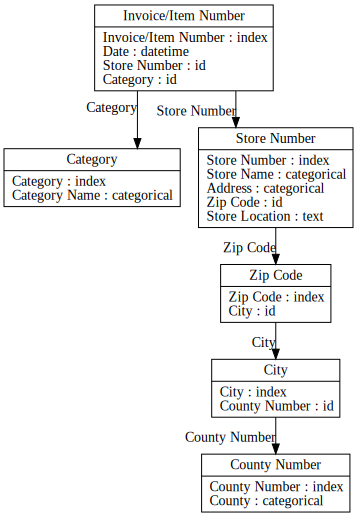

In [19]:
entityset.plot()

Above you can see plotted the entities within entityset, and the relationships between them. Each entity contains the data from the original df with duplication removed. 

In [20]:
entityset

Entityset: liquor orders
  Entities:
    Invoice/Item Number [Rows: 1497599, Columns: 4]
    Category [Rows: 75, Columns: 2]
    Store Number [Rows: 1574, Columns: 5]
    Zip Code [Rows: 422, Columns: 2]
    City [Rows: 377, Columns: 2]
    County Number [Rows: 99, Columns: 2]
  Relationships:
    Invoice/Item Number.Store Number -> Store Number.Store Number
    Invoice/Item Number.Category -> Category.Category
    Store Number.Zip Code -> Zip Code.Zip Code
    Zip Code.City -> City.City
    City.County Number -> County Number.County Number